# Revisar las siguientes referencias para graficar con el paquete base y [ggplot2](https://ggplot2.tidyverse.org/) de R

## Github

Alicia Mastretta:

* https://github.com/AliciaMstt/BioinfinvRepro/blob/master/Unidad3/Graficar%20en%20R.Rmd

* https://github.com/AliciaMstt/BioinfinvRepro/blob/master/Unidad3/Graficar_en_R.html


Sonia Mendizábal:

* https://github.com/Songeo/R_intro/tree/master/2_visualizacion

---

**Nota** 

El archivo con extensión `.Rmd` se abre con [Rstudio](https://rstudio.com/) y el `.html` en su browser.

---

## Libros

* M.D. Ugarte, A. F. Militino, A. T. Arnholt, "Probability and Statistics with R", **2ed** (que tiene github: [alanarnholt/PASWR2E-Book](https://github.com/alanarnholt/PASWR2E-Book)) capítulo 2 tiene ejemplos de ambos paquetes: `base` y `ggplot2` de R.

* [R for Data Science](https://r4ds.had.co.nz/) por Hadley Wickham y Garret Grolemund.

* [R Graphics Cookbook](http://www.cookbook-r.com/Graphs/) por Winston Chang.


## Documentación

* https://ggplot2.tidyverse.org/

# Visualización con [ggplot2](https://ggplot2.tidyverse.org/)

Un paquete de R que es versátil para la visualización bonita de datos es el de `ggplot2`. Tal paquete implementa *grammar of graphics* que es un sistema para describir y construir los componentes de una gráfica. Ver [The Grammar of Graphics](https://www.springer.com/gp/book/9780387245447) y [A Layered Grammar of Graphics](https://byrneslab.net/classes/biol607/readings/wickham_layered-grammar.pdf).

In [1]:
library(ggplot2) #cargamos el paquete con la función library

## Una opción para graficar es con la función [qplot](https://ggplot2.tidyverse.org/reference/qplot.html)

In [2]:
x <- c(1,2, 3) #vector con valores 1, 2, 4

In [3]:
print(x)

[1] 1 2 3


In [4]:
y <- seq(1, 2, .5)

In [5]:
print(y)

[1] 1.0 1.5 2.0


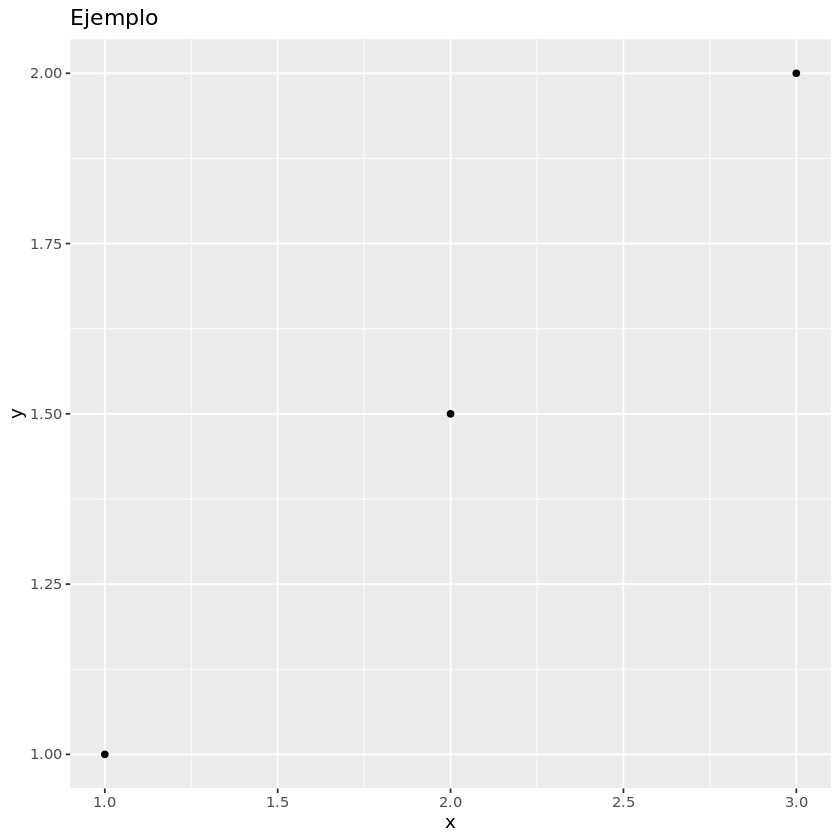

In [6]:
qplot(x = x, y = y, main = "Ejemplo") 

## Otra función para graficar más versátil es [ggplot](https://ggplot2.tidyverse.org/reference/ggplot.html)

Con la función `ggplot` creamos un sistema de coordenadas al que le podemos colocar capas o *layers*. 

In [7]:
coordinate_system <- ggplot()

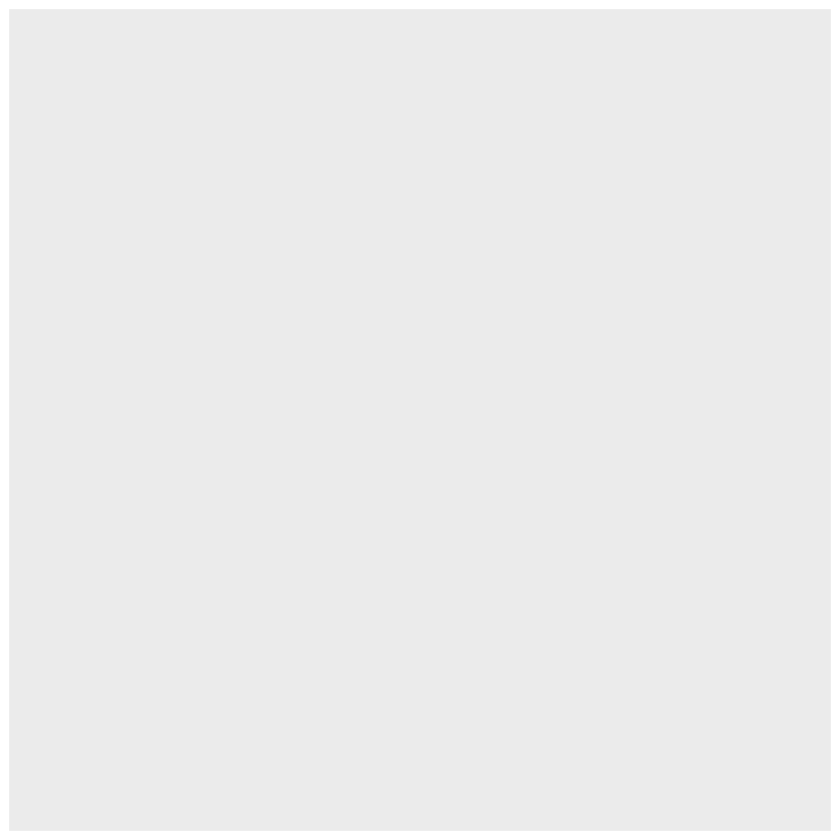

In [8]:
coordinate_system

Y para hacer una gráfica colocaremos los datos anteriores en un *data frame*.

| Variable1 | Variable 2|
|:---:|:---:|
|4| 7.5|
|-5.1|8|

In [9]:
df <- data.frame(variable1 = x, variable2 = y) 

In [10]:
print(df)

  variable1 variable2
1         1       1.0
2         2       1.5
3         3       2.0


El paquete `ggplot2` tiene funciones que añaden **capas de diferentes tipo** a una gráfica. Tales funciones tienen un argumento de nombre *mapping* que define cómo se mapean las variables a **propiedades visuales** de los objetos de una gráfica. Este argumento siempre se le acompaña de la función [aes](https://ggplot2.tidyverse.org/reference/aes.html) (`aes` se refiere a *aesthetics*) que recibe argumentos para las propiedades.

Un ejemplo para añadir una **capa de puntos** a la gráfica es [geom_point](https://ggplot2.tidyverse.org/reference/geom_point.html) que crea un *scatterplot*. En la función `aes` usamos los nombres `x` y `y` que son las **localizaciones** de los puntos cuyos valores los toman de las variables `variable1` y `variable2` del *data frame* anterior y que estarán en el eje horizontal y el eje vertical respectivamente. En este caso las localizaciones de los puntos son las propiedades visuales de la gráfica, *aka aesthetics*.

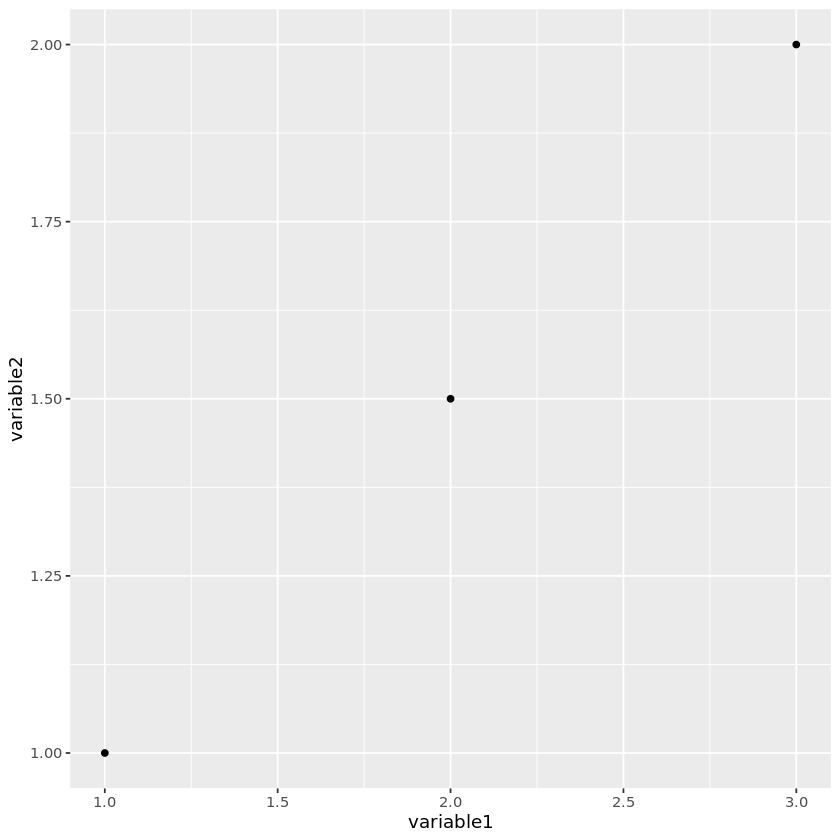

In [11]:
coordinate_system + geom_point(df, mapping = aes(x = variable1, y = variable2))

Otra forma de usar la función `ggplot` es pasarle como argumento el *data frame* directamente:

In [12]:
coordinate_system2 <- ggplot(data = df)

Esto nos permite a no pasar el *data frame* en la función `geom_point`, obsérvese que también podemos omitir el nombre `mapping` de argumento:

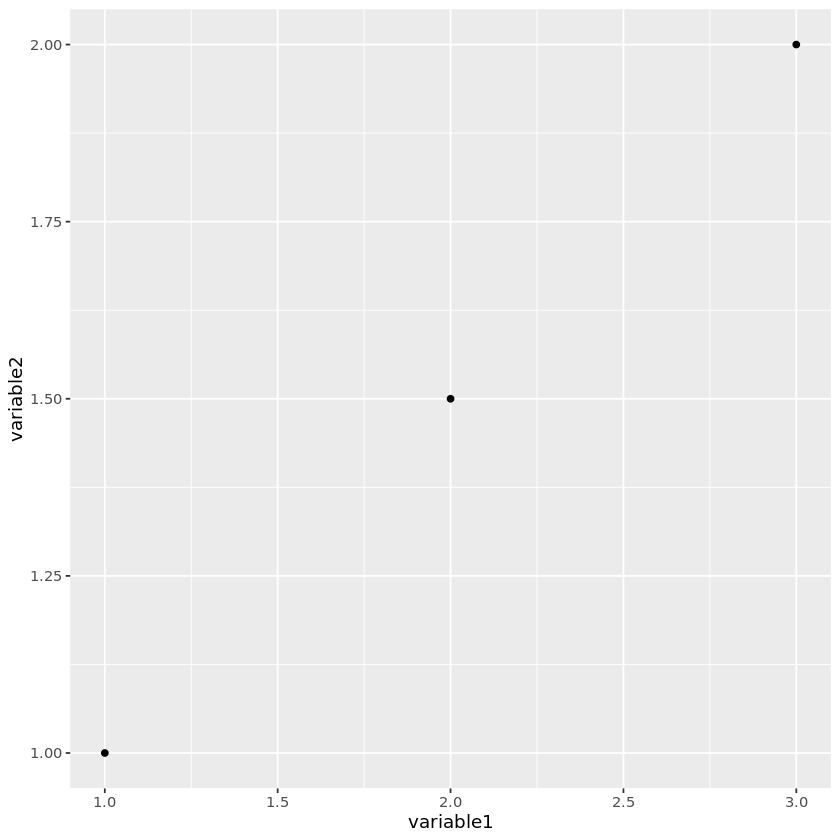

In [13]:
coordinate_system2 + geom_point(aes(x = variable1, y = variable2))

Otros *aesthetics* son **tamaño, forma o color**, por ejemplo, y podemos hacer el mapeo de alguna propiedad a alguna variable de mi *data frame*. 

In [14]:
clase <- c("clase1", "clase2", "clase1")

In [15]:
df2 <- data.frame(variable1 = x, variable2 = y, variable3=clase) 

In [16]:
print(df2)

  variable1 variable2 variable3
1         1       1.0    clase1
2         2       1.5    clase2
3         3       2.0    clase1


In [17]:
coordinate_system3 <- ggplot(data = df2)

Para el color usamos:

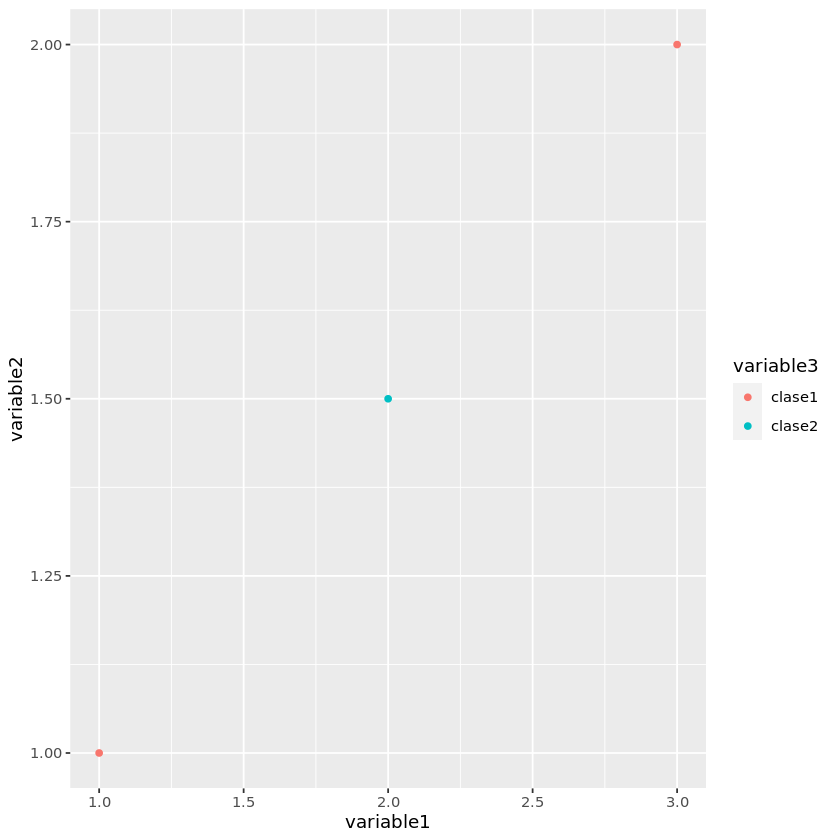

In [18]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color= variable3))

Obsérvese que se ha elegido automáticamente un **color** para cada nivel de la `variable3` que es la clase y su leyenda.

Para el **tamaño** y **color**:

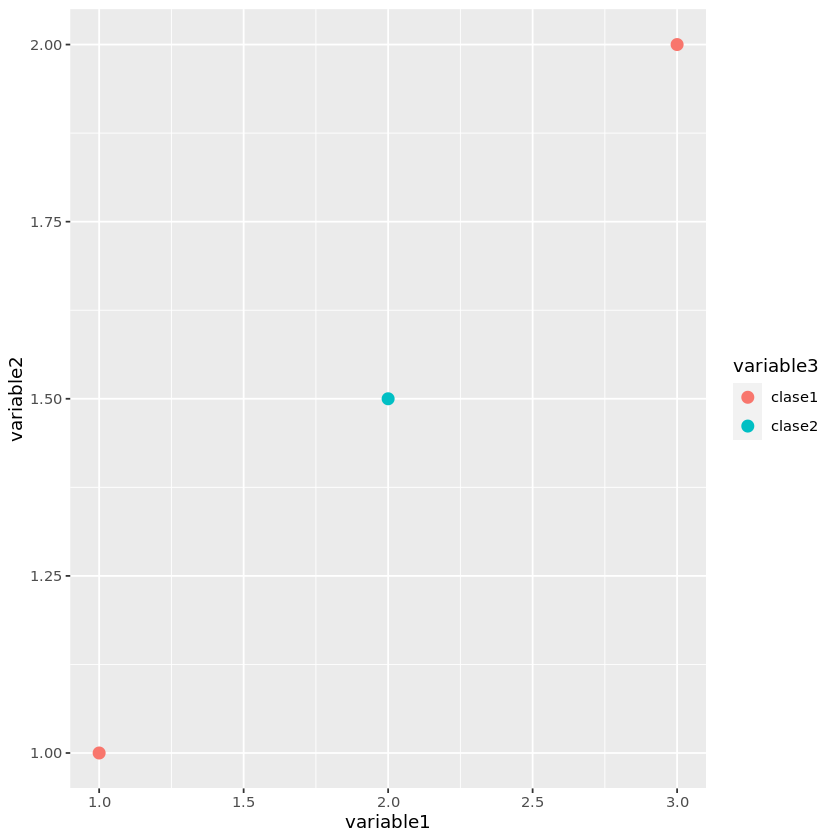

In [19]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color = variable3),
                                size = 3)

O bien si queremos que varíe el **tamaño** de acuerdo a los valores de la `variable3` (aunque no tendría mucho sentido tener tamaños con valores `clase1` o `clase2`)

Warning message:
“Using size for a discrete variable is not advised.”


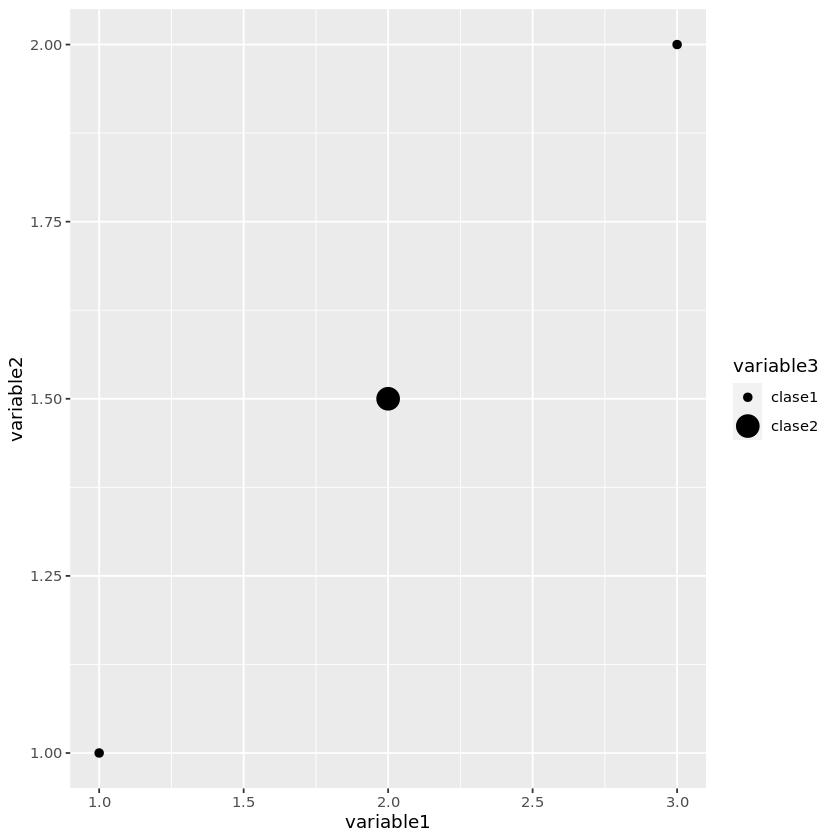

In [20]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, size = variable3))

Cambiando la **forma**:

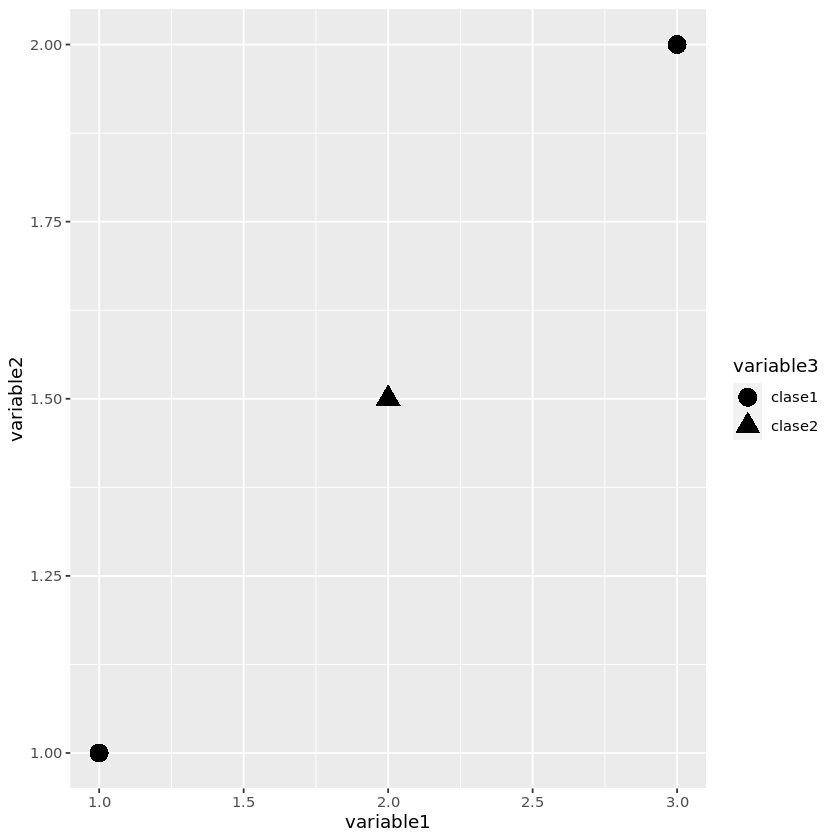

In [21]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, shape = variable3),
                                size = 5)


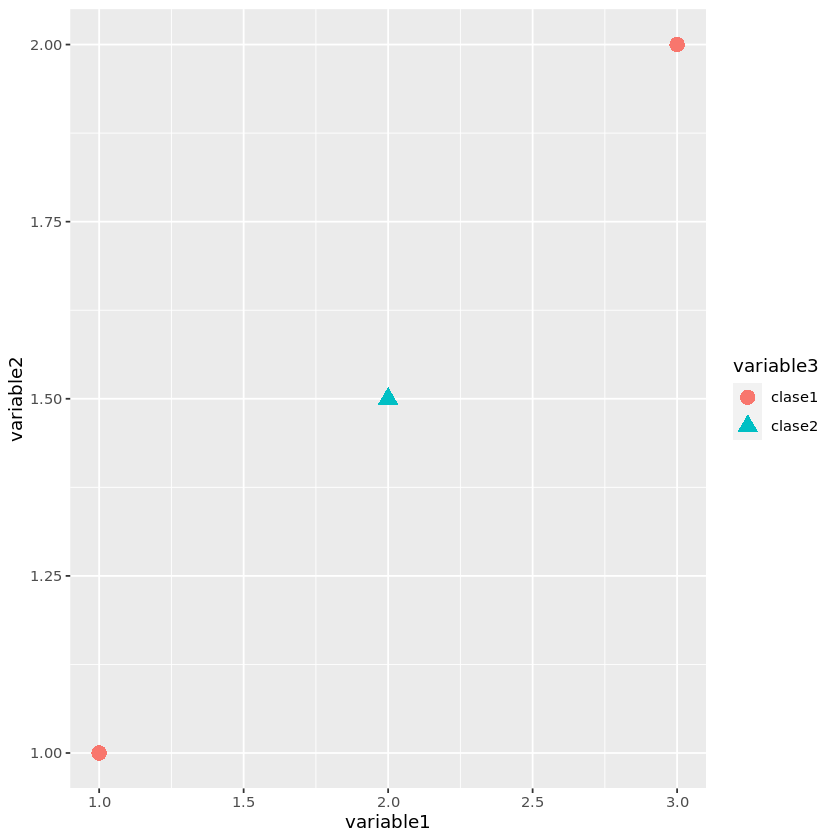

In [22]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color = variable3,
                                    shape = variable3),
                                size = 4)

En resúmen la función `aes` dentro de `geom_point` nos ayuda a asociar el nombre de una *aesthetic* con una variable.

Podemos también establecer **de forma manual** los *aesthetics* por ejemplo el color:

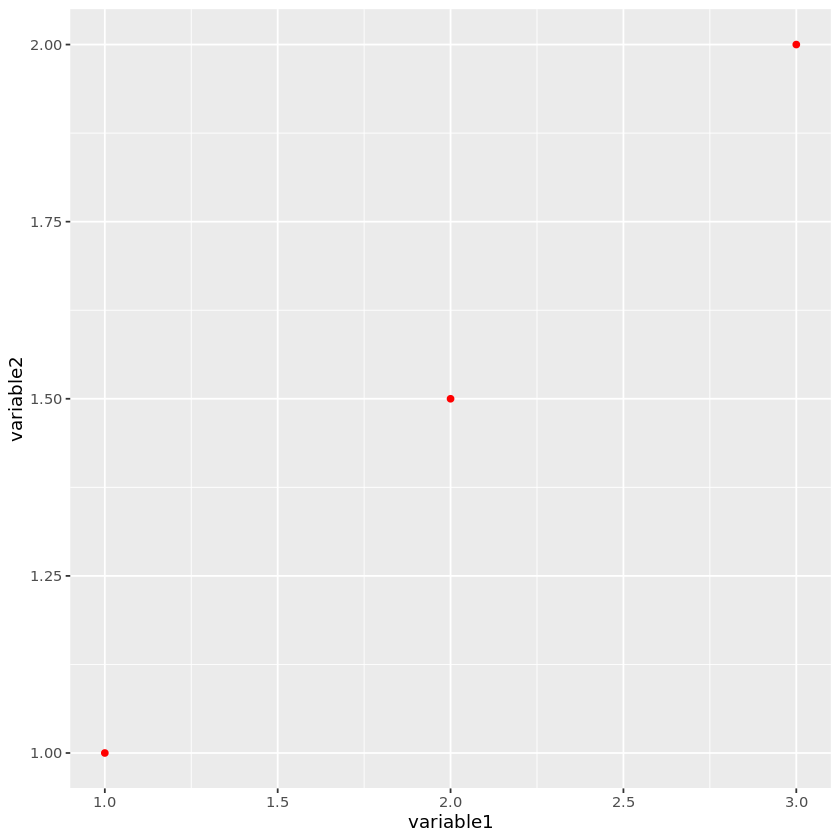

In [23]:
coordinate_system2 + geom_point(aes(x = variable1, y = variable2), 
                                color = "red")

El color y tamaño:

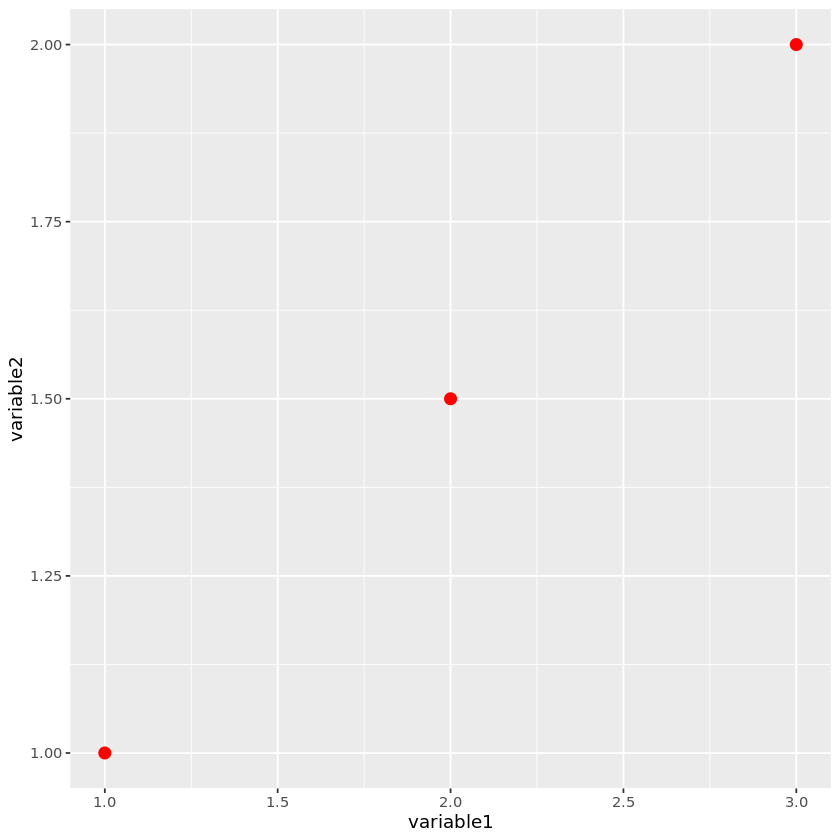

In [24]:
coordinate_system2 + geom_point(aes(x = variable1, y = variable2), 
                                color = "red",
                                size=3)

El color, el tamaño y la forma:

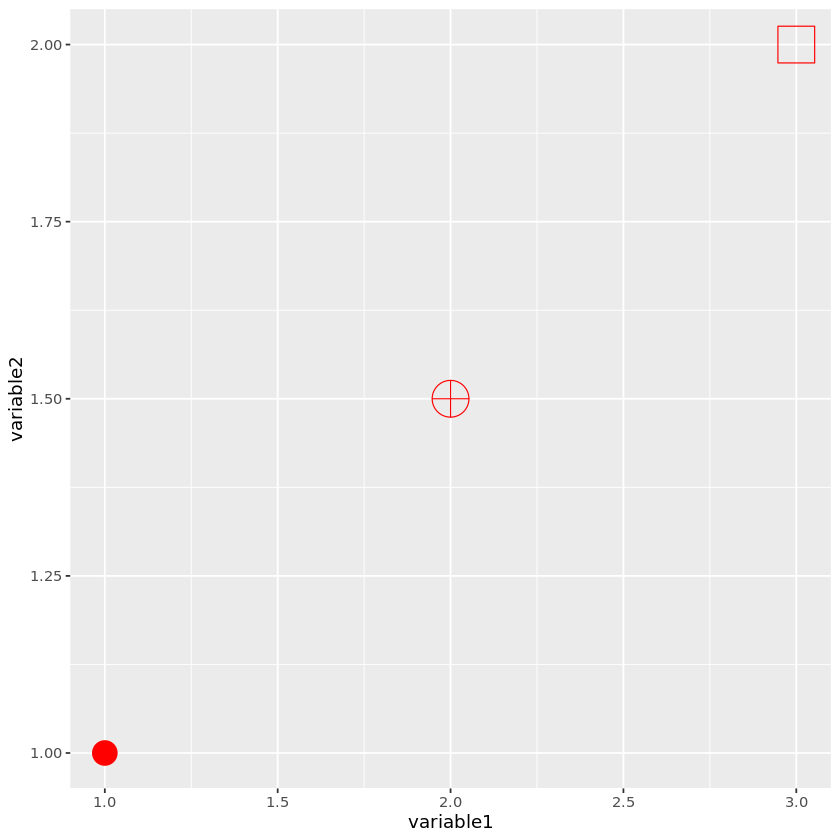

In [25]:
coordinate_system2 + geom_point(aes(x = variable1, y = variable2), 
                                color = "red",
                                size=10, 
                                shape = c(20,10,0))

Ver [r-plot-pch-symbols-the-different-point-shapes-available-in-r](http://www.sthda.com/english/wiki/r-plot-pch-symbols-the-different-point-shapes-available-in-r) como una referencia de los valores numéricos y formas para gráficas de puntos.

Añadiendo título:

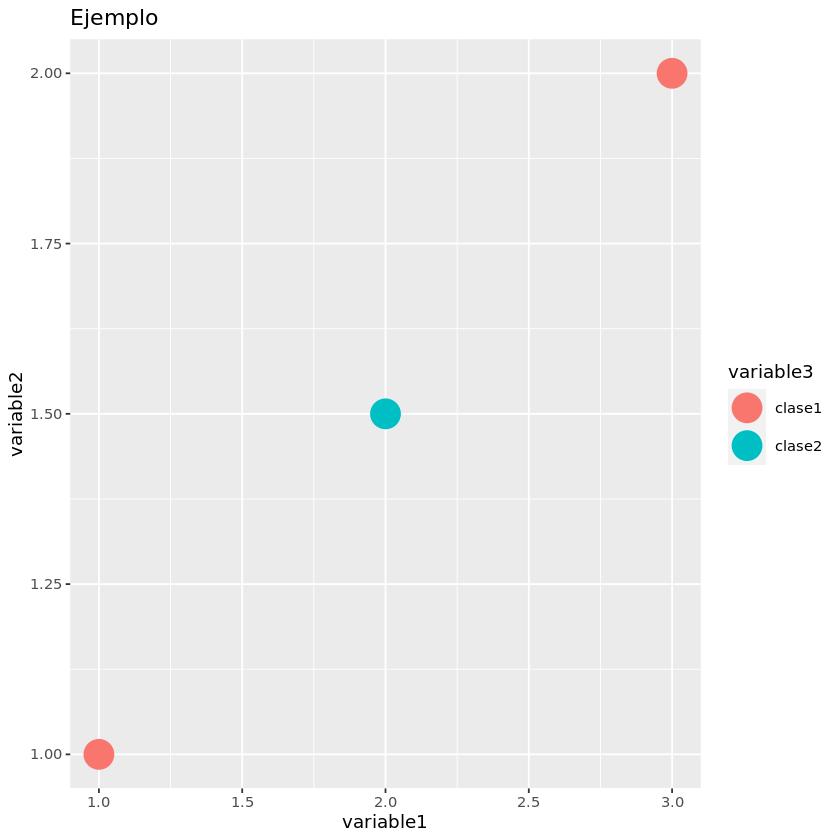

In [26]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color=variable3), 
                                size = 8) +
                     ggtitle('Ejemplo')

Centrando el título y ajustando su tamaño:

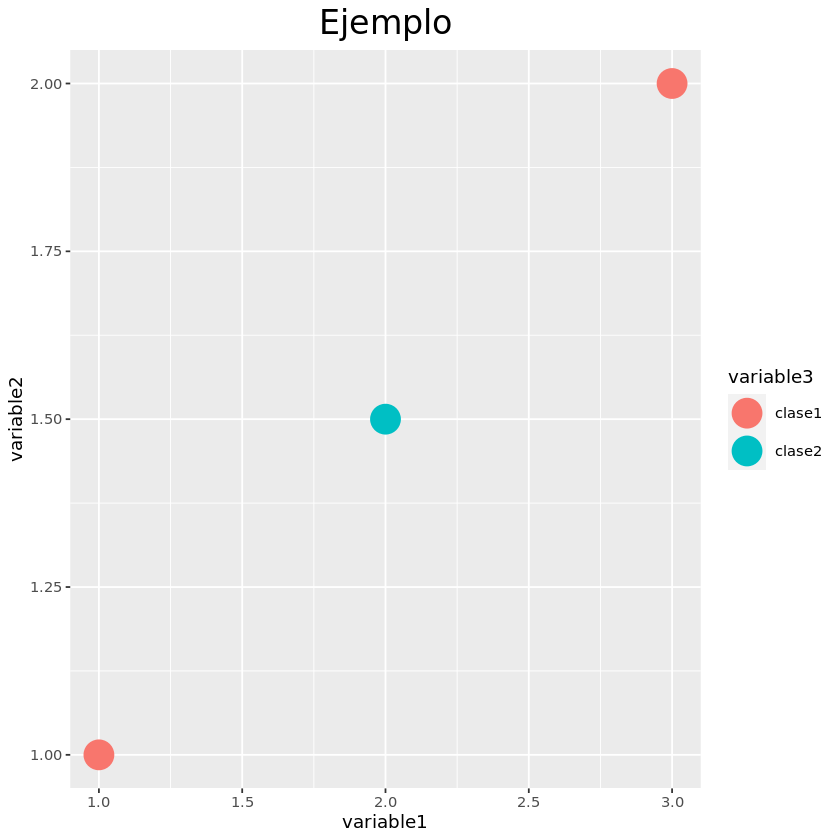

In [27]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color=variable3),
                                size= 8) +
                     ggtitle('Ejemplo') +
                     theme(plot.title = element_text(size=20, hjust = 0.5))

Centrando el título, ajustando su tamaño e incrementando tamaño de los rótulos de los ejes:

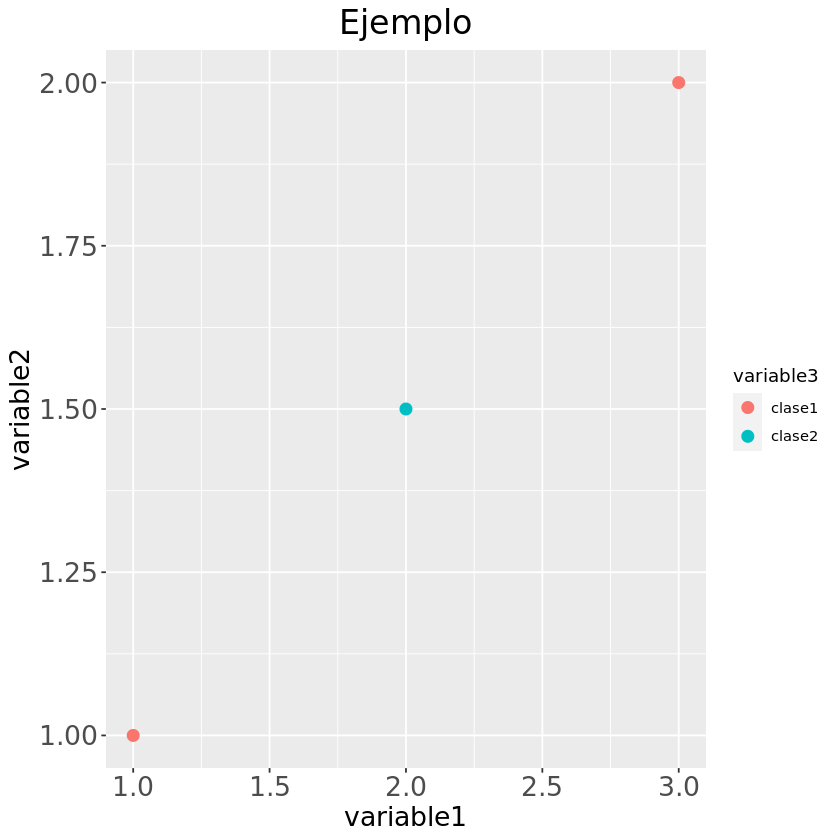

In [28]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color=variable3), 
                                size = 3) +
                     ggtitle('Ejemplo') +
                     theme(plot.title = element_text(size=20, hjust = 0.5),
                           axis.text=element_text(size=16),
                           axis.title=element_text(size=16))

## *Facets*

Si tenemos una variable que nos categorize nuestros datos podemos usar la función [facet_wrap](https://ggplot2.tidyverse.org/reference/facet_wrap.html) para graficar varios *subplots*. El primer argumento de esta función debe ser la variable de los datos utilizando el símbolo `~`.

Por ejemplo, si tenemos los datos:

In [29]:
npoints <- 21
x <- rnorm(npoints)
y <- rnorm(npoints)
nclass1 <- npoints/3
clase1_aux <- c(rep("a", nclass1), rep("b", nclass1), rep("c", nclass1))
clase1 <- sample(clase1_aux, npoints, replace=TRUE)

In [30]:
df <- data.frame(variable1 = x, variable2 = y, clase1 = clase1)

In [31]:
print(df)

    variable1   variable2 clase1
1  -0.3323770  0.33985719      a
2  -0.9515407 -0.29926856      a
3   0.3754449  0.84102279      b
4  -0.7041931 -1.45846489      a
5   1.7161821 -0.45047077      c
6  -1.0625323 -0.78560868      c
7   2.0237149  0.30563012      b
8  -0.9244470 -1.39334631      c
9  -1.3302126 -1.39594303      b
10  1.7817613  1.38024564      c
11  0.9430413  0.15588969      b
12  0.5878496  0.82482556      a
13  0.2201207 -0.07599198      a
14 -0.5575107 -1.59499598      c
15 -2.7012652  0.53916459      b
16 -1.6363220  0.69896739      a
17 -0.7528985  0.89745188      c
18  0.7685870 -0.69137403      b
19 -0.5700250  0.52966201      b
20  2.8041229  1.17710694      b
21 -1.0798912  2.08742723      b


In [32]:
csystem <- ggplot(df)

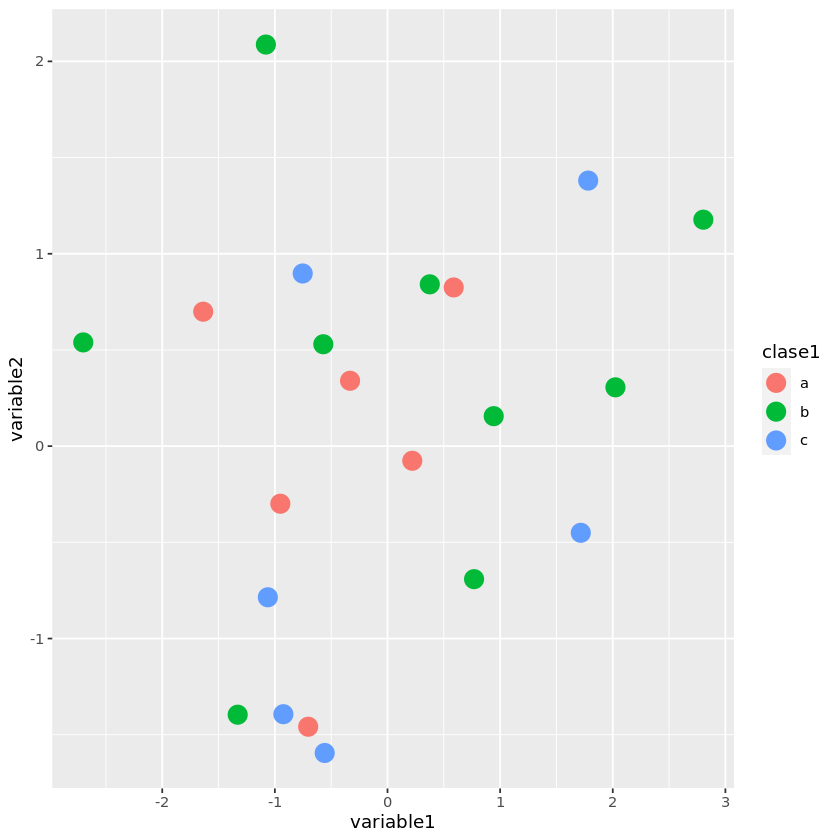

In [33]:
csystem + geom_point(aes(x = variable1, y = variable2, color = clase1),
                     size = 5)

Usamos `facet_wrap` y `ncol` para número de columnas, obsérvese que la variable categórica es usada como `~clase1`:

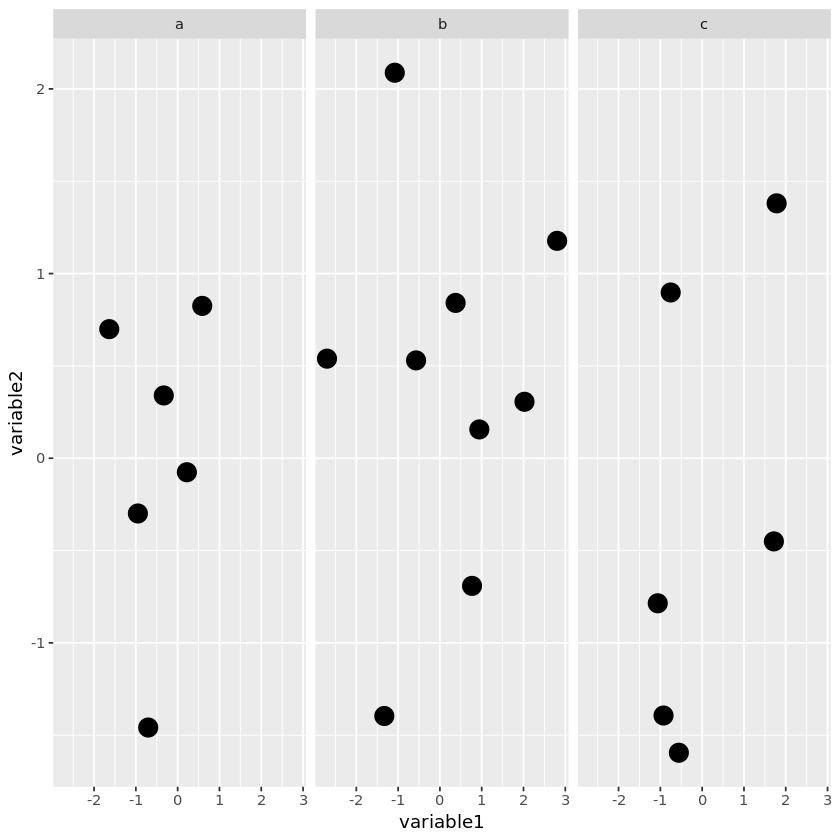

In [34]:
csystem + geom_point(aes(x = variable1, y = variable2),
                     size = 5) +
          facet_wrap(~clase1, ncol = 3)

`nrow` para número de renglones:

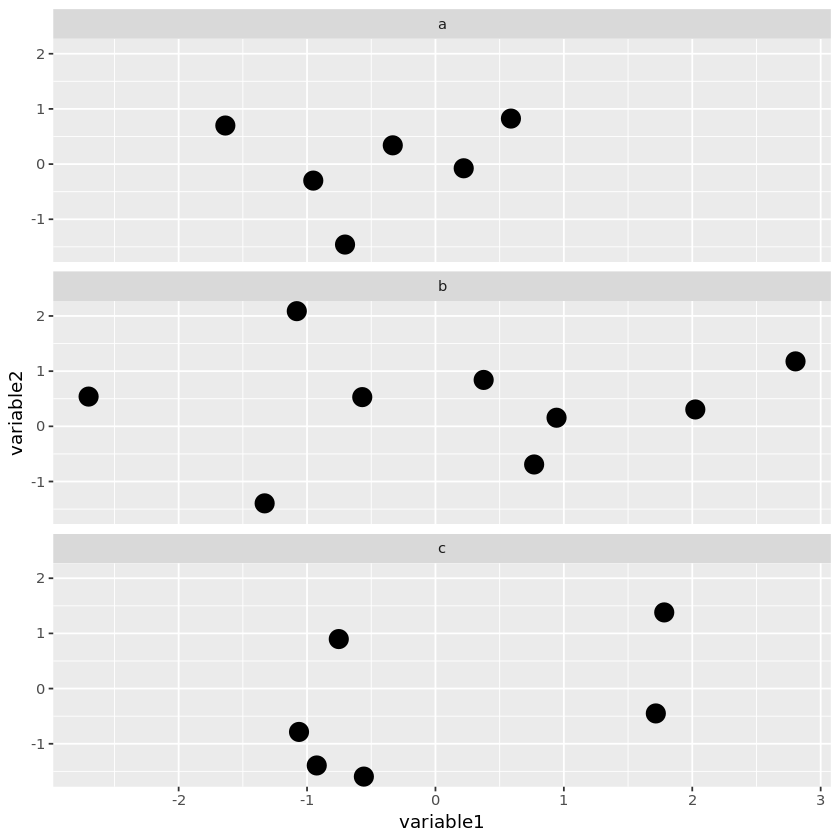

In [35]:
csystem + geom_point(aes(x = variable1, y = variable2),
                     size = 5) +
          facet_wrap(~clase1, nrow=3)

Y si tenemos otra variable que también nos categorize los datos y queremos hacer la subdivisión por ambas variables podemos usar la función [facet_grid](https://ggplot2.tidyverse.org/reference/facet_grid.html)

In [36]:
nclass2 <- npoints/2
clase2_aux <- c(rep("X", nclass2), rep("O", nclass2))
clase2 <- sample(clase2_aux, npoints, replace=TRUE)

Al *data frame* anterior le añadimos la variable `clase2` con la siguiente línea:

In [37]:
df$clase2 <- clase2

*Data frame*:

In [38]:
print(df)

    variable1   variable2 clase1 clase2
1  -0.3323770  0.33985719      a      X
2  -0.9515407 -0.29926856      a      O
3   0.3754449  0.84102279      b      O
4  -0.7041931 -1.45846489      a      X
5   1.7161821 -0.45047077      c      X
6  -1.0625323 -0.78560868      c      X
7   2.0237149  0.30563012      b      O
8  -0.9244470 -1.39334631      c      O
9  -1.3302126 -1.39594303      b      X
10  1.7817613  1.38024564      c      O
11  0.9430413  0.15588969      b      O
12  0.5878496  0.82482556      a      O
13  0.2201207 -0.07599198      a      O
14 -0.5575107 -1.59499598      c      O
15 -2.7012652  0.53916459      b      X
16 -1.6363220  0.69896739      a      O
17 -0.7528985  0.89745188      c      X
18  0.7685870 -0.69137403      b      X
19 -0.5700250  0.52966201      b      O
20  2.8041229  1.17710694      b      X
21 -1.0798912  2.08742723      b      O


Creamos otro sistema de coordenadas con los datos incorporando la variable `clase2`:

In [39]:
csystem2 <- ggplot(df)

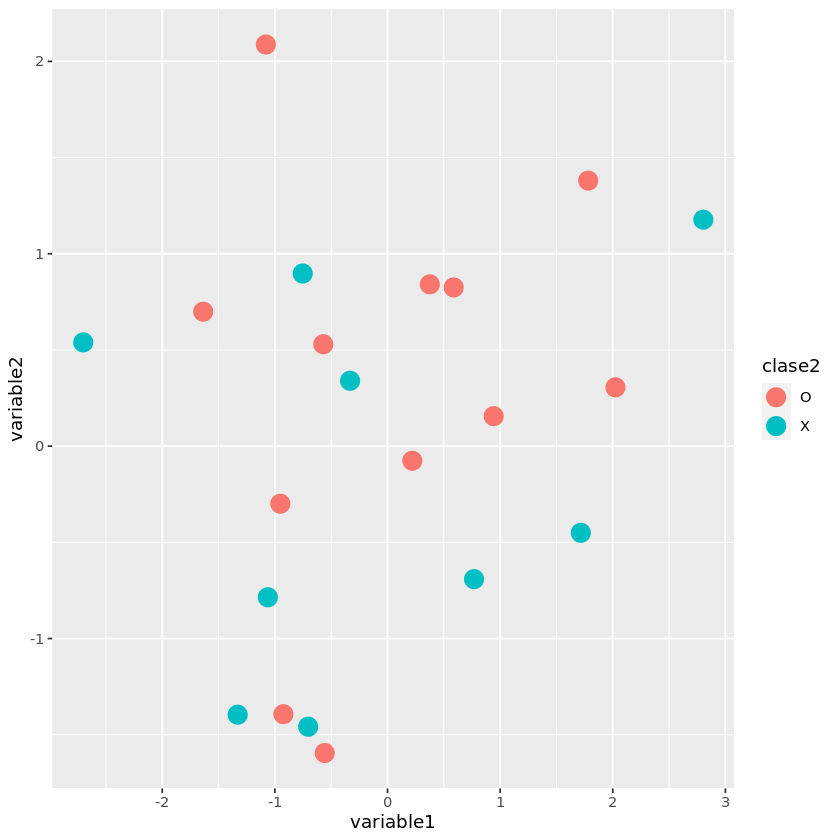

In [40]:
csystem2 + geom_point(aes(x = variable1, y = variable2, color = clase2),
                     size = 5)

Podemos volver a usar `facet_wrap`:

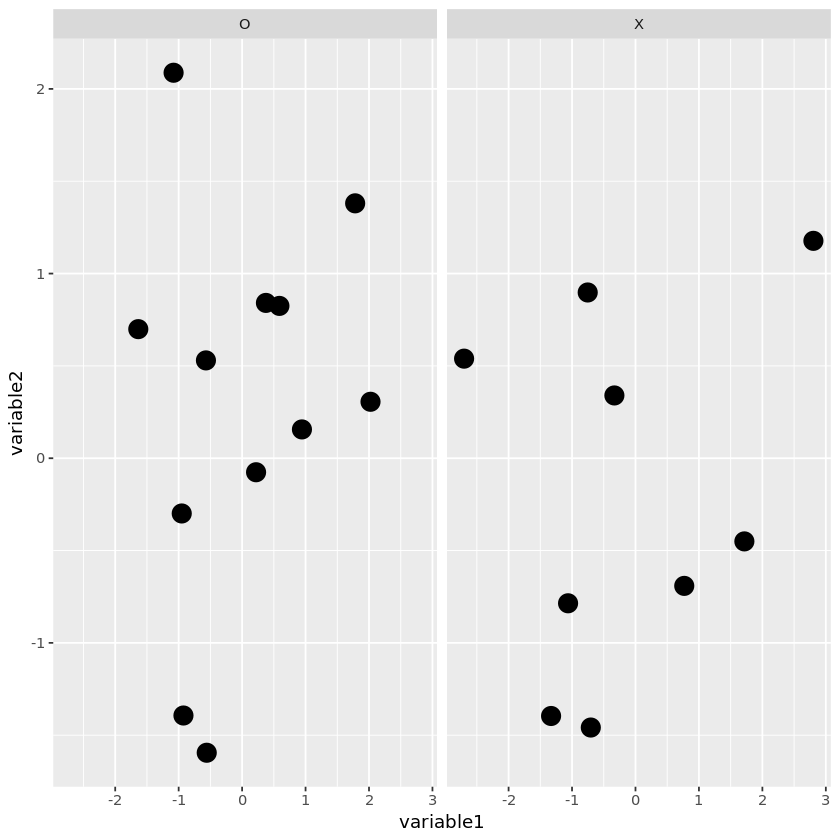

In [41]:
csystem2 + geom_point(aes(x = variable1, y = variable2),
                     size = 5) +
           facet_wrap(~clase2)

Usamos `facet_grid` con la expresión `clase1 ~ clase2`:

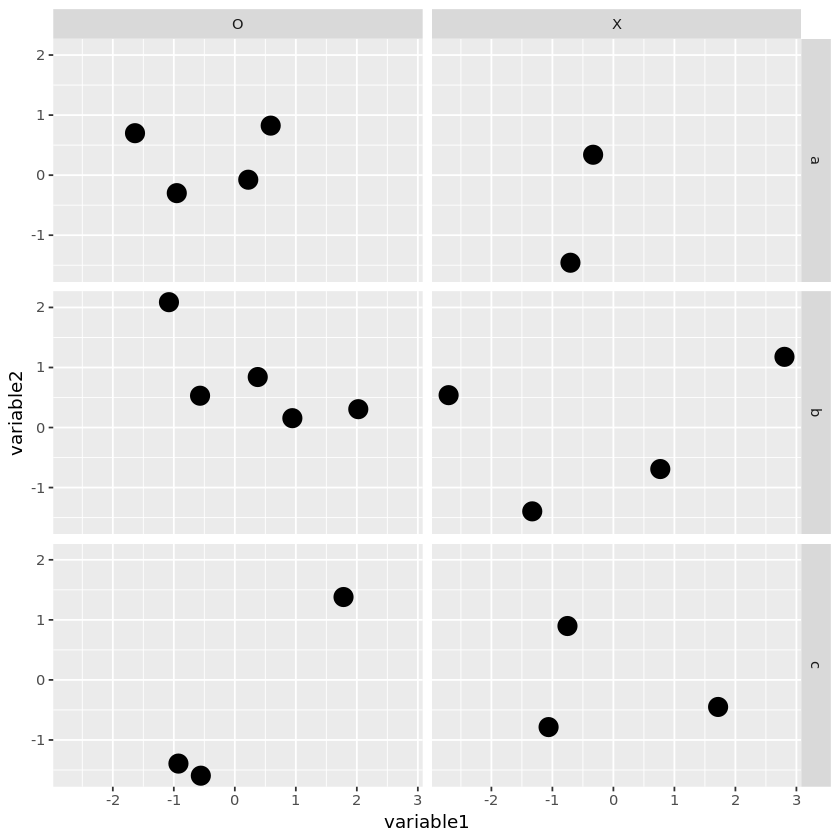

In [42]:
csystem2 + geom_point(aes(x = variable1, y = variable2),
                     size = 5) +
           facet_grid(clase1~clase2)

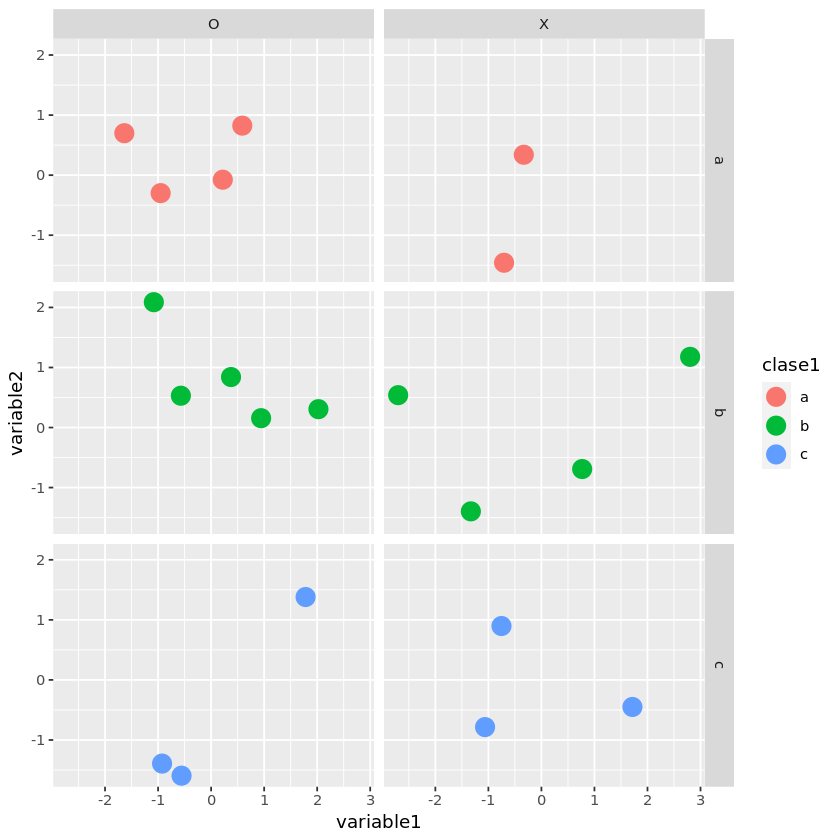

In [43]:
csystem2 + geom_point(aes(x = variable1, y = variable2,color=clase1),
                     size = 5) +
           facet_grid(clase1~clase2)

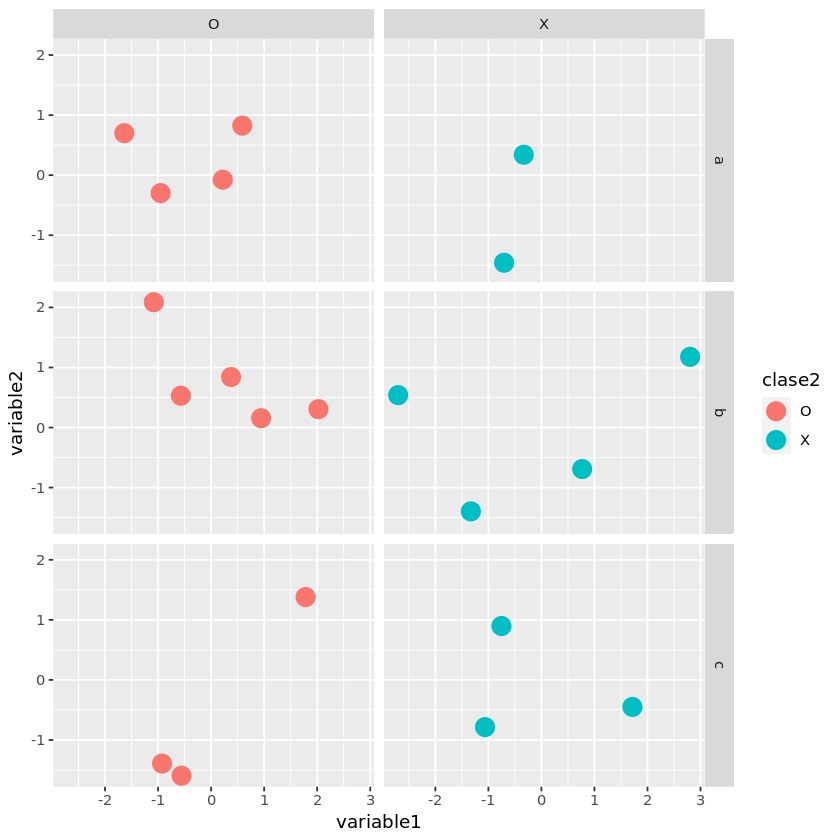

In [44]:
csystem2 + geom_point(aes(x = variable1, y = variable2,color=clase2),
                     size = 5) +
           facet_grid(clase1~clase2)

O bien con la expresión `clase2 ~ clase1`:

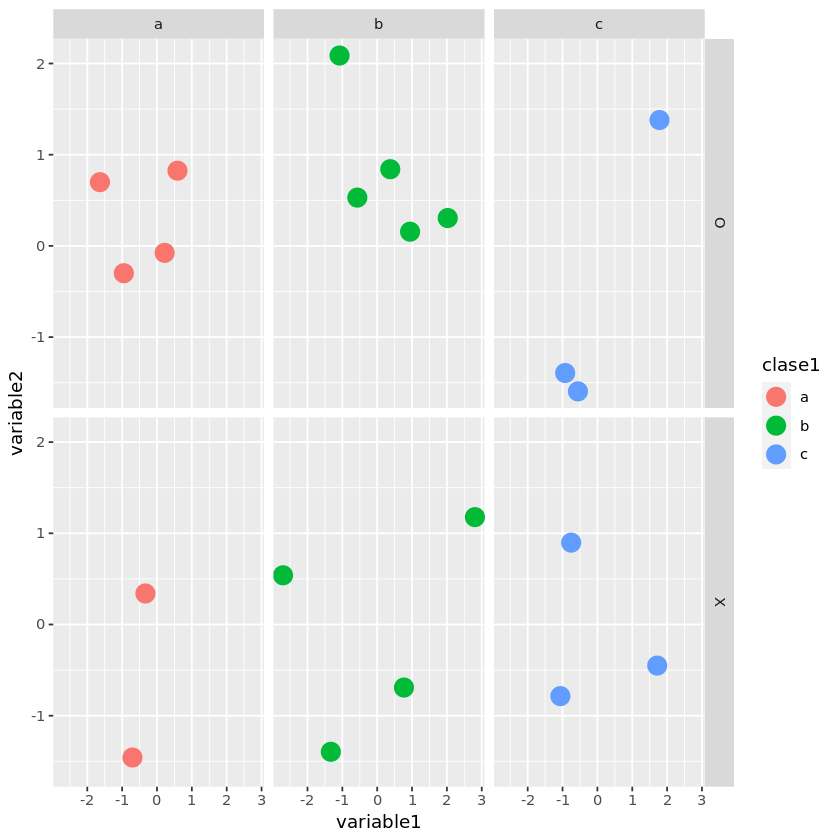

In [45]:
csystem2 + geom_point(aes(x = variable1, y = variable2,color=clase1),
                     size = 5) +
           facet_grid(clase2~clase1)